# PCA: batch preprocessing and online-PCA
__Group ALT: Andreea-Maria Gui, Laura Lyra, Ngyuen Tien__

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(name,skiprows, delimiter, usecols = None):
    """
    return: loaded data set in numpy array
    """
    return np.loadtxt(name, delimiter = delimiter, skiprows = skiprows, usecols = usecols)   

def principal_components(data):
    """
    gets data were the columns are different components and rows are different observations
    return: centered data, covariance matrix, sorted eigenvalues and normalized eigenvectors IN COLUMNS 
    in descending order
    """

    centered_data = (data - np.mean(data,axis=0)).T
    cov_matrix = np.cov(centered_data)
    eigenval, eigenvec = np.linalg.eig(cov_matrix)
    
    idx = eigenval.argsort()[::-1]
    sorted_eigenvals = eigenval[idx]
    sorted_eigenvecs = eigenvec[idx,:]
    
    sorted_eigenvecs = sorted_eigenvecs/np.linalg.norm(sorted_eigenvecs,axis=0)  # normalize eigenvectors
    return centered_data, cov_matrix, sorted_eigenvals,sorted_eigenvecs

def data_to_eigenspace(eigenvectors, centered_data):
    """
    Takes matrix of eigenvectors, where each eigenvector is a column and centered_data, 
    where each row is one dimension and the columns are different observations
    :return: numpy array with data in the principal components coordinates
    """
    return np.dot(eigenvectors.T,centered_data)

def whitening(eigvecs,eigvals,centered_data):
    """
    takes data where eigvals are in columns and normalized
    return: whitenned data where the new variables are in the rows, having zero mean 
    and unit variance
    """
    lambda_inv = np.diag(1/np.sqrt(eigvals_X3))
    temp = eigvals.T @ centered_data
    V = lambda_inv @ temp
    return V, temp

def online_pca(data,eps):
    """
    data as observations in rows and dimensions in columns, eps: learning rate
    return: weight vector at each time step according to Oja's rule
    """
    weight = np.random.random(data.shape)
    for t in range(data.shape[0]-1):
        y = np.dot(weight[t].T,data[t])
        weight[t+1] = weight[t] + np.dot(eps*y,data[t]) - np.dot(eps*y,np.dot(y,weight[t]))
    
    return weight

## Exercise 2.1: Preprocessing

In [3]:
#load the data sets
X1 = load_data("pca2.csv", skiprows=1, delimiter = ",")

In [4]:
X1_cent, cov_X1, eigvals_X1, eigvecs_X1 = principal_components(X1)
eigvals_X1, eigvecs_X1

(array([3.15899214, 1.20513042]),
 array([[ 0.88773892, -0.46034728],
        [ 0.46034728,  0.88773892]]))

In [5]:
X1_trans = data_to_eigenspace(eigvecs_X1, X1_cent)

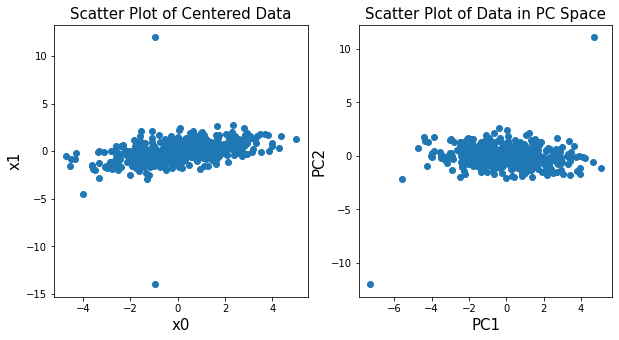

In [6]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
axs[0].scatter(X1_cent[0],X1_cent[1])
axs[0].set_xlabel("x0", fontsize = 15)
axs[0].set_ylabel("x1", fontsize = 15)
axs[0].set_title("Scatter Plot of Centered Data", fontsize = 15)

axs[1].scatter(X1_trans[0],X1_trans[1])
axs[1].set_xlabel("PC1", fontsize=15)
axs[1].set_ylabel("PC2", fontsize = 15)
axs[1].set_title("Scatter Plot of Data in PC Space", fontsize = 15)

plt.show()

What do you observe?

In [7]:
#remove observations 17 and 157
X2 = X1.copy()
obsrevations_to_remove = [16,156]
X2 = np.delete(X2, obsrevations_to_remove, axis = 0)

X2_cent, cov_X2, eigvals_X2, eigvecs_X2 = principal_components(X2)
X2_trans = data_to_eigenspace(eigvecs_X2, X2_cent)
eigvals_X2, eigvecs_X2

(array([3.05366443, 0.64014267]),
 array([[ 0.93549122, -0.35334993],
        [ 0.35334993,  0.93549122]]))

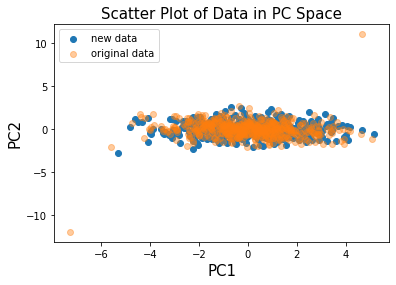

In [8]:
plt.scatter(X2_trans[0],X2_trans[1], label = "new data", alpha = 1)
plt.scatter(X1_trans[0],X1_trans[1], label = "original data", alpha = 0.4)
plt.xlabel("PC1", fontsize=15)
plt.ylabel("PC2", fontsize = 15)
plt.legend()
plt.title("Scatter Plot of Data in PC Space", fontsize = 15)
plt.show()

What's the difference?

## Exercise 2.2: Whitening

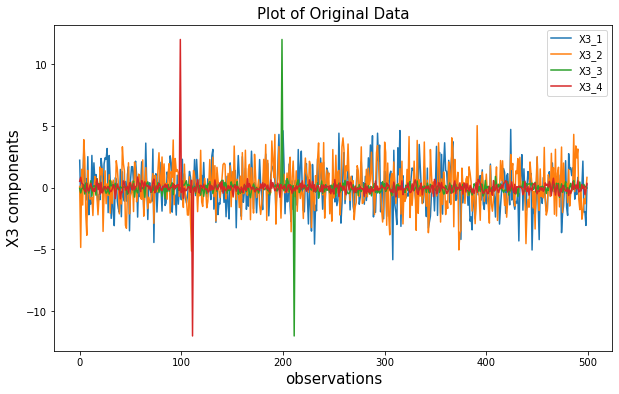

In [9]:
X3 = load_data("pca4.csv", skiprows = 1 , delimiter = ",")
plt.figure(figsize = (10,6))
plt.plot(X3)
plt.xlabel("observations", fontsize=15)
plt.ylabel("X3 components", fontsize = 15)
plt.title("Plot of Original Data", fontsize = 15)
plt.legend(["X3_1","X3_2","X3_3","X3_4"])
plt.show()

Outliers in columns 3 and 4 from the data set, having components bigger than 10.

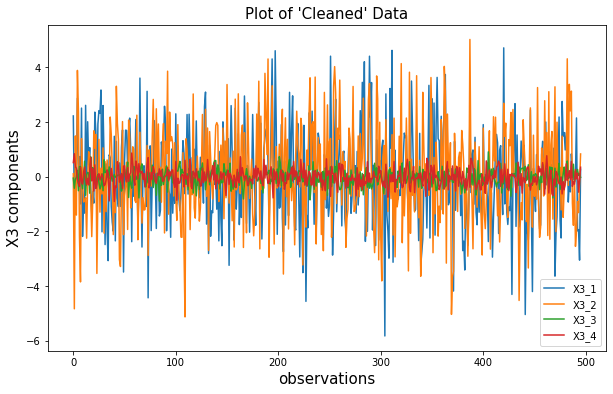

In [10]:
threshold = 10
outliers_to_remove = np.where(np.abs(X3)>threshold)[0]
X3 = np.delete(X3, outliers_to_remove, axis = 0)

plt.figure(figsize = (10,6))
plt.plot(X3)
plt.xlabel("observations", fontsize=15)
plt.ylabel("X3 components", fontsize = 15)
plt.title("Plot of 'Cleaned' Data", fontsize = 15)
plt.legend(["X3_1","X3_2","X3_3","X3_4"])
plt.show()

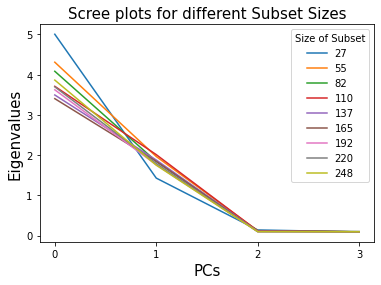

In [11]:
X3_nrows = int(X3.shape[0]/2)
subset_sizes = np.linspace(0,X3_nrows,10, dtype = int)[1:None]

for count, size in enumerate(subset_sizes):
    X3_partial = X3[0:size]
    _,_,eigvals, eigvecs = principal_components(X3_partial)
    plt.plot(eigvals, label = "{}".format(size))

plt.title("Scree plots for different Subset Sizes", fontsize = 15)
plt.xlabel("PCs", fontsize = 15)
plt.xticks([0,1,2,3])
plt.ylabel("Eigenvalues", fontsize = 15)
plt.legend(title = "Size of Subset");

Subset size = 55 is reasonably good. 

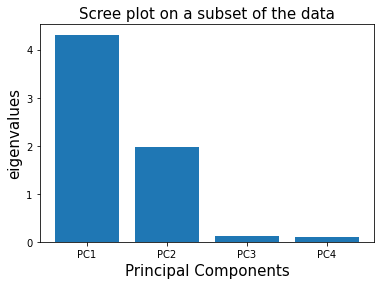

In [12]:
X3_subset = X3[0:55]
X3_cent, cov_X3, eigvals_X3, eigvecs_X3 = principal_components(X3_subset)
plt.bar(["PC1","PC2","PC3","PC4"],eigvals_X3)
plt.xlabel('Principal Components', fontsize = 15)
plt.ylabel('eigenvalues', fontsize = 15)
plt.title('Scree plot on a subset of the data', fontsize = 15)
plt.show()

2 PCs represent the data well

In [13]:
X3_cent, cov_X3, eigvals_X3, eigvecs_X3 = principal_components(X3_subset)
V, MTX = whitening(eigvals_X3,eigvecs_X3, X3_cent)

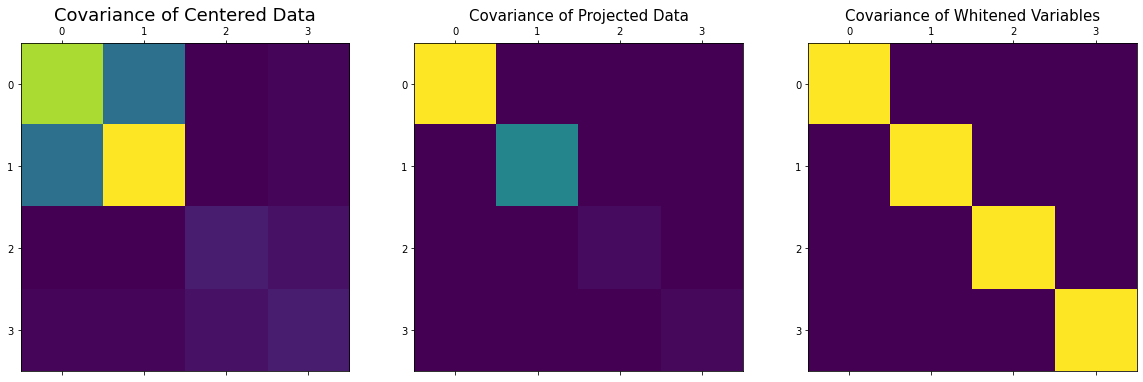

In [14]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 10)

axs[0].matshow(cov_X3)
axs[0].set_title("Covariance of Centered Data", fontsize = 18)

axs[1].matshow(np.cov(MTX))
axs[1].set_title("Covariance of Projected Data", fontsize = 15)

axs[2].matshow(np.cov(V))
axs[2].set_title("Covariance of Whitened Variables", fontsize = 15);


### Exercise 2.4: Oja's Rule: Application

In [15]:
X4 = load_data("data-onlinePCA.txt", skiprows=1, delimiter = ",",  usecols = range(1, 3))

In [16]:
X4.shape

(2000, 2)

In [17]:
X4_blocks = X4.reshape((10,200,2))

In [18]:
#take the first eigenvector (first PC) of each block
X4_block_PCS = np.zeros((10,2))
for i in range(10):
    _,_, _, eigvecs_X4_temp = principal_components(X4_blocks[i,:])
    X4_block_PCS[i] = eigvecs_X4_temp[:,0]

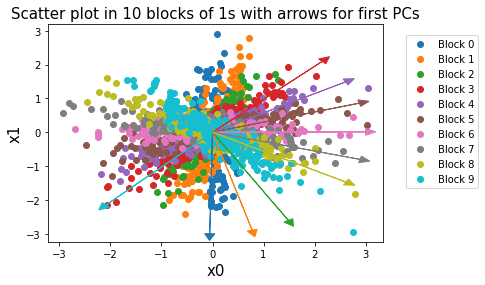

In [19]:
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
for i in range(10):
    plt.scatter(X4_blocks[i,:,0],X4_blocks[i,:,1],label = "Block {}".format(i))
    plt.arrow(0, 0, 3*X4_block_PCS[i,0],3*X4_block_PCS[i,1],head_width=0.2, head_length=0.2,color= color[i])
plt.legend(bbox_to_anchor=[1.3, 0.6], loc='right')
plt.title("Scatter plot in 10 blocks of 1s with arrows for first PCs", fontsize = 15)
plt.xlabel("x0", fontsize = 15)
plt.ylabel("x1", fontsize = 15);

In [20]:
learning_rates = [0.002,0.04,0.45]
w0 = online_pca(X4,learning_rates[0]).reshape((10,200,2))
w1 = online_pca(X4,learning_rates[1]).reshape((10,200,2))
w2 = online_pca(X4,learning_rates[2]).reshape((10,200,2))
w = np.array((w0,w1,w2))

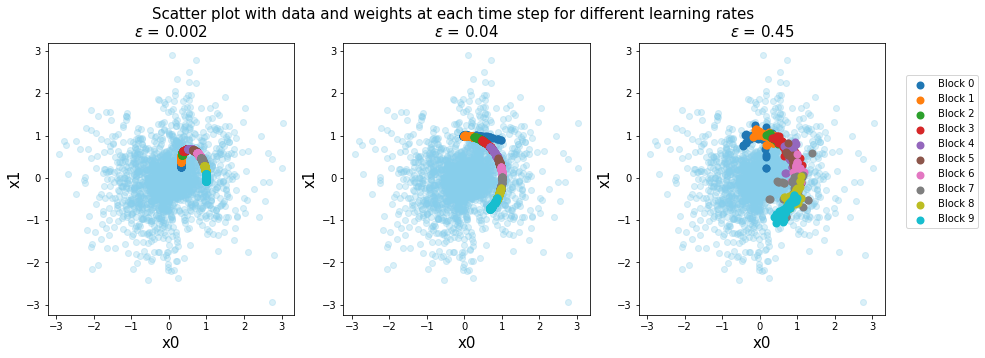

In [22]:
fig, axs = plt.subplots(1, 3,figsize=(15, 5))
for n in range(3):
    axs[n].scatter(X4[:,0],X4[:,1],label = "",alpha = 0.3, color = 'skyblue')
    for i in range(10):
        axs[n].scatter(w[n,i,:,0],w[n,i,:,1],label = "Block {}".format(i),linewidths=2,color= color[i])
        axs[n].set_xlabel("x0", fontsize = 15)
        axs[n].set_ylabel("x1", fontsize = 15)
        axs[n].set_title(r"$\epsilon$ = {}".format(learning_rates[n]),fontsize=15)

plt.suptitle("Scatter plot with data and weights at each time step for different learning rates", fontsize = 15)
plt.legend(bbox_to_anchor=[1.4, 0.6], loc='right');
